In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [62]:
# Read data

# Frequency
freq_data = np.genfromtxt("TTF_Data_100.000_1.500_2.500.csv.csv")

# Load pickle
with open("TTF_data.pt", "rb") as f:
    TTF_data = pickle.load(f)

with open("Vs_values.pt", "rb") as f:
    Vs_data = pickle.load(f)

TTF_data = np.array(TTF_data)
Vs_data = np.array(Vs_data)

In [63]:
idx = np.argsort(Vs_data)
Vs_data = Vs_data[idx]
TTF_data = TTF_data[idx,:]

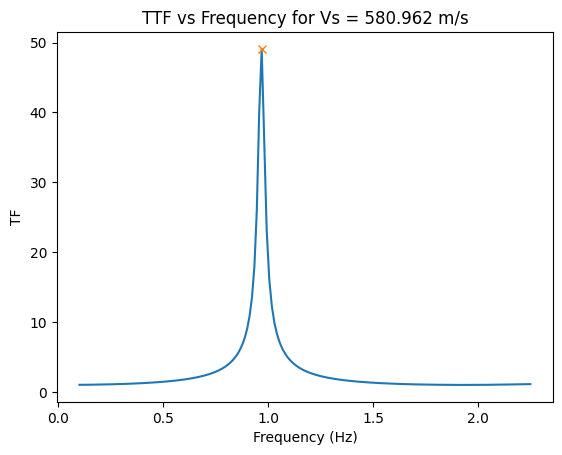

In [66]:
# Extract the peaks from the data
from scipy.signal import find_peaks

ix = 1

peaks, _ = find_peaks(TTF_data[ix,:], height=0.5)
plt.plot(freq_data, TTF_data[ix,:])
plt.plot(freq_data[peaks], TTF_data[ix,peaks], "x")
plt.title("TTF vs Frequency for Vs = {} m/s".format(Vs_data[ix]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("TF")
plt.show()

In [65]:
# Fit an exponential function to the peaks
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

ix = 150
peaks, _ = find_peaks(TTF_data[ix,:], height=0.5)

def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(exp_func, freq_data[peaks], TTF_data[ix,peaks])

# Get R_2 value
r2 = r2_score(TTF_data[ix,peaks], exp_func(freq_data[peaks], *popt))
print("R^2 value: ", r2)

# Print equation
print("TTF = {:.2f} * exp(-{:.2f} * f) + {:.2f}".format(popt[0], popt[1], popt[2]))

plt.plot(freq_data, TTF_data[ix,:])
plt.plot(freq_data[peaks], TTF_data[ix,peaks], "x")
plt.plot(freq_data, exp_func(freq_data, *popt))
plt.title("TTF vs Frequency for Vs = {} m/s".format(Vs_data[ix]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("TF")
plt.show()

TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=1